In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
#Load the Data set
df1=pd.read_csv("E:\\residency_3\\SA 2\\mini-project\\HR_Analytics\\HR_comma_sep.csv")
df1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df1.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
#Are there any missing values in this dataset
df1.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
sales                    False
salary                   False
dtype: bool

In [5]:
#Les find out how many people left in total?
df1.groupby(['left']).size()

left
0    11428
1     3571
dtype: int64

In [6]:
#What are the different departments in this data set?
df1.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
df_dept=pd.DataFrame(df1.groupby(['sales','left']).size())
df_dept.columns=['count']
df_dept1=pd.DataFrame(df_dept.unstack())
df_dept1.columns=['stay_count','left_count']
df_dept1=df_dept1.reset_index()
df_dept1['Left_percent']=df_dept1.left_count/(df_dept1.stay_count+df_dept1.left_count)
df_dept1.sort_values(by='Left_percent',ascending=False,inplace=True)
labels =df_dept1.sales.unique()
#plt.figure(figsize=(20,20))
plt.rcParams['figure.figsize']=(25,10)

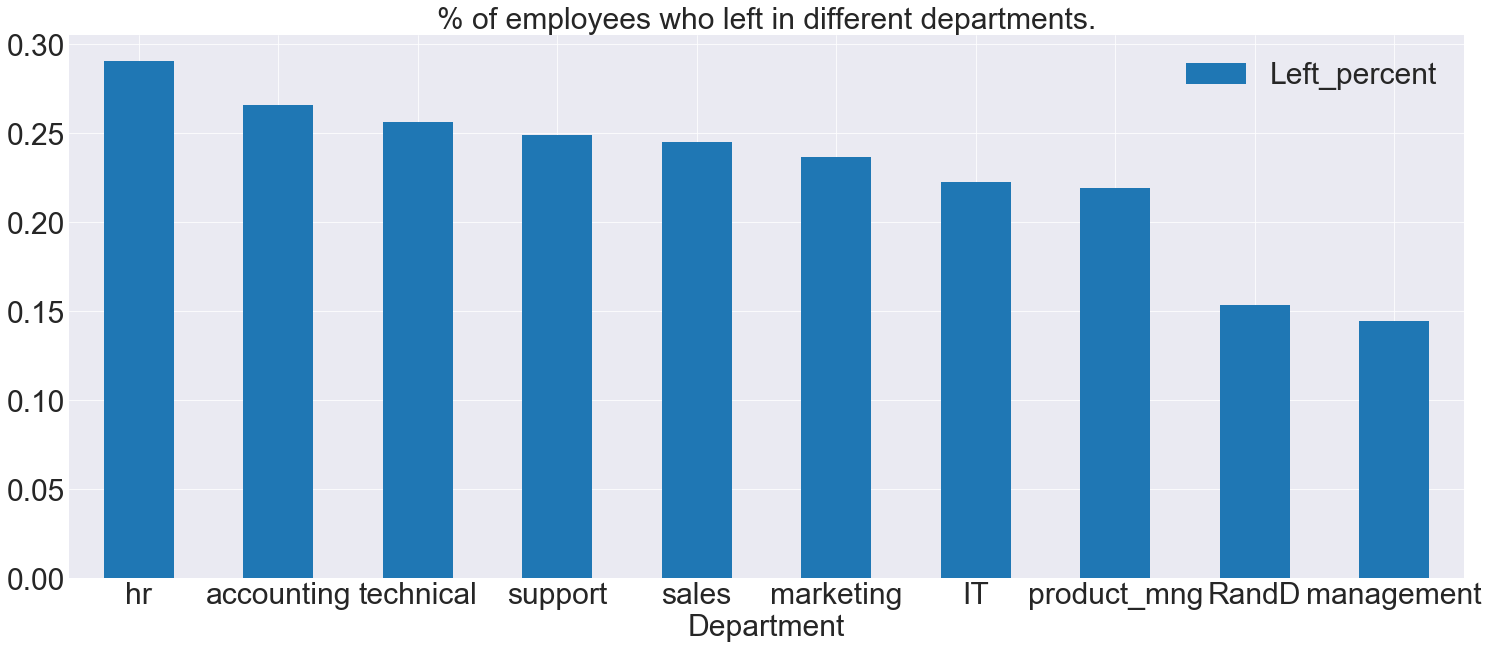

In [8]:
#Lets find out how much % of people left in each dept 
df_dept1['Left_percent'].plot(kind='bar',legend=True)
plt.title(fontsize=30,s="% of employees who left in different departments.")
plt.xticks(range(0,10),labels,fontsize=30,rotation=0)
plt.yticks(fontsize=30)
plt.legend(fontsize=30)
plt.xlabel("Department",fontsize=30)
plt.savefig('E:\\residency_3\\SA 2\\mini-project\plots\\depts.png')

In [9]:
#Lets find out how many how many people who got promoted in the last 5 years left
df_promotion=df1.groupby(['promotion_last_5years','left']).size()
df_promotion.columns=['count']
df_promotion=df_promotion.unstack()
df_promotion.columns=['stay_count','left_count']
#df_promotion.reset_index
df_promotion['percent']=df_promotion.left_count/(df_promotion.stay_count+df_promotion.left_count)
df_promotion

,stay_count,left_count,percent
promotion_last_5years,,,
0,11128,3552,0.241962
1,300,19,0.059561


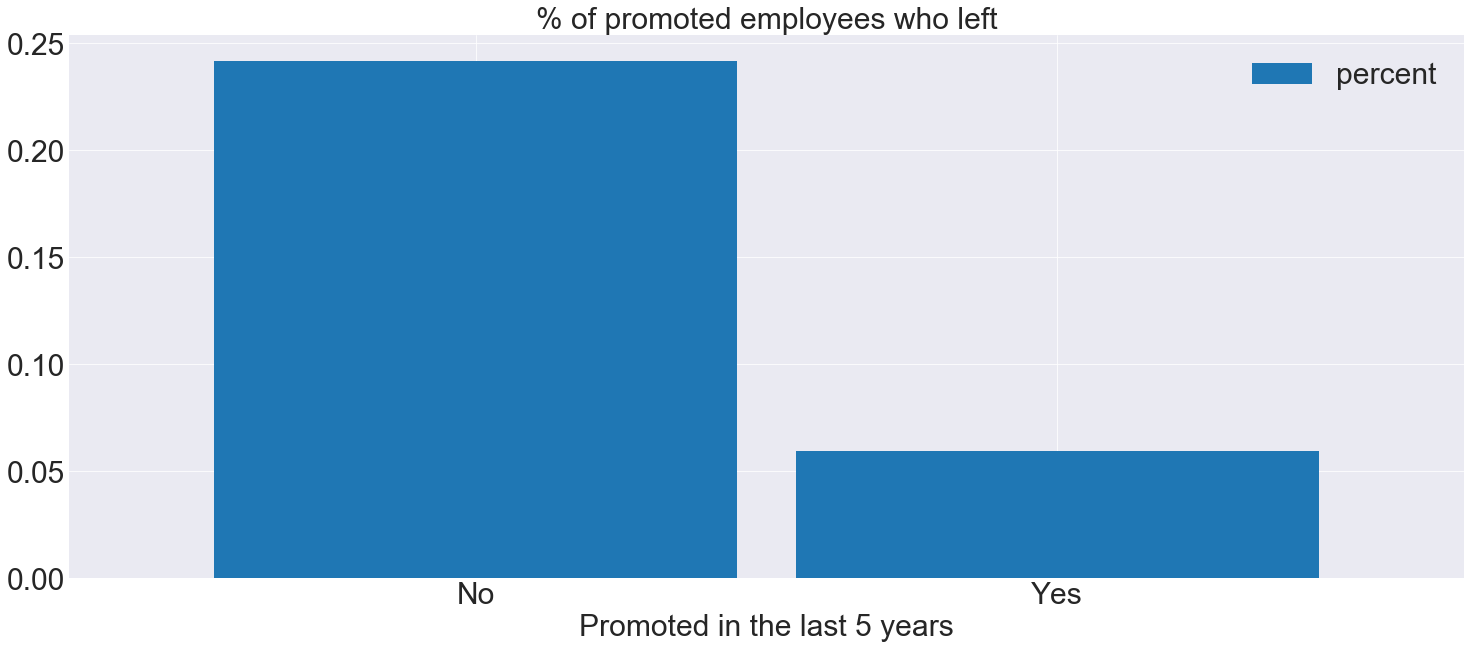

In [10]:
import matplotlib.pyplot as plt1
labels1=['No','Yes']
plt1.title(fontsize=30,s="% of promoted employees who left")
plt1.rcParams['figure.figsize']=(25,10)
df_promotion['percent'].plot(kind='bar',legend=True,width=0.9)
plt1.xticks(range(0,2),labels1,fontsize=30,rotation=0)
plt1.yticks(fontsize=30)
plt1.legend(fontsize=30)
plt1.xlabel("Promoted in the last 5 years",fontsize=30)
plt.savefig('E:\\residency_3\\SA 2\\mini-project\plots\\promotion.png')

In [11]:
df_acc=pd.DataFrame(df1.groupby(['Work_accident',"left"]).size())
df_acc.columns=['count']
df_acc=df_acc.unstack()
df_acc.columns=['stay_count','left_count']
df_acc['percent']=df_acc.left_count/(df_acc.stay_count+df_acc.left_count)

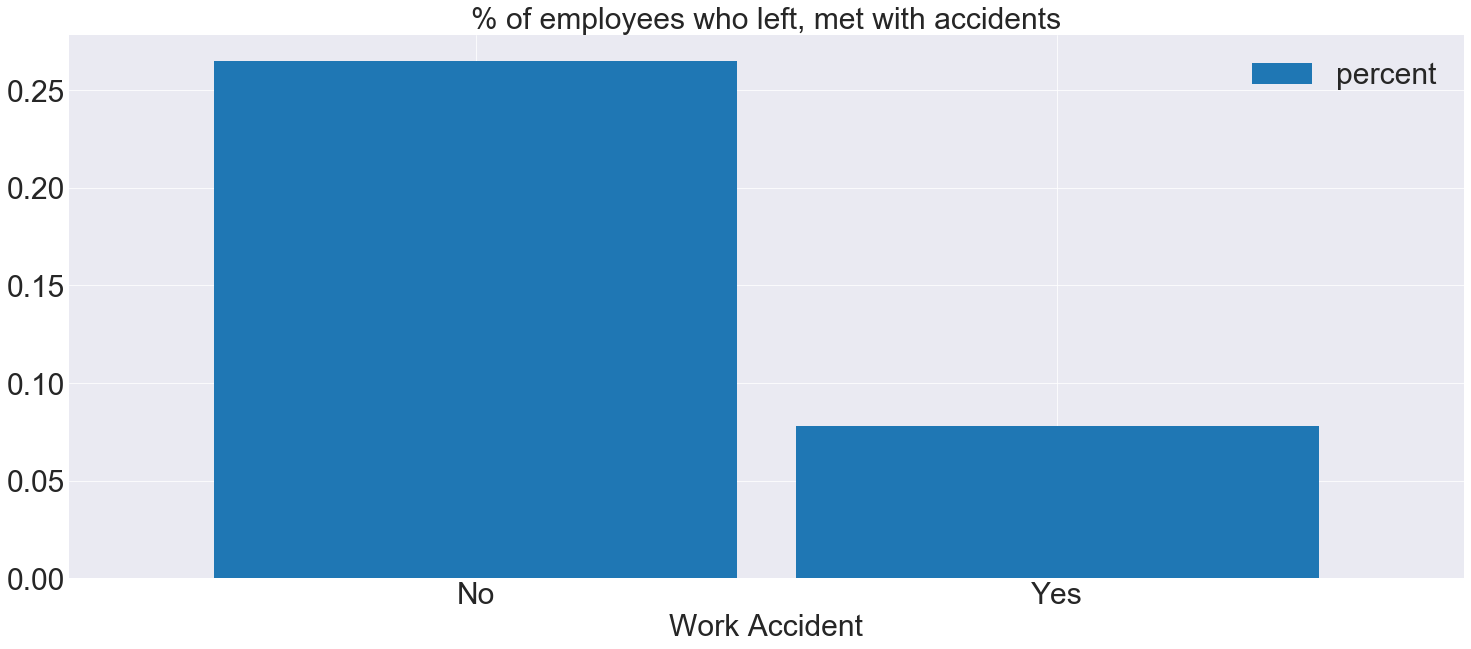

In [12]:
import matplotlib.pyplot as plt2
labels1=['No','Yes']
plt2.title(fontsize=30,s="% of employees who left, met with accidents")
plt2.rcParams['figure.figsize']=(25,10)
df_acc['percent'].plot(kind='bar',legend=True,width=0.9)
plt2.xticks(range(0,2),labels1,fontsize=30,rotation=0)
plt2.yticks(fontsize=30)
plt2.legend(fontsize=30)
plt2.xlabel("Work Accident",fontsize=30)
plt2.savefig('E:\\residency_3\\SA 2\\mini-project\plots\\accident.png')

In [13]:
df_salary=pd.DataFrame(df1.groupby(['salary',"left"]).size())
df_salary.columns=['count']
df_salary=df_salary.unstack()
df_salary.columns=['stay_count','left_count']
df_salary['percent']=df_salary.left_count/(df_salary.stay_count+df_salary.left_count)
df_salary.sort_values(by='percent',ascending=False,inplace=True)
df_salary

,stay_count,left_count,percent
salary,,,
low,5144,2172,0.296884
medium,5129,1317,0.204313
high,1155,82,0.066289


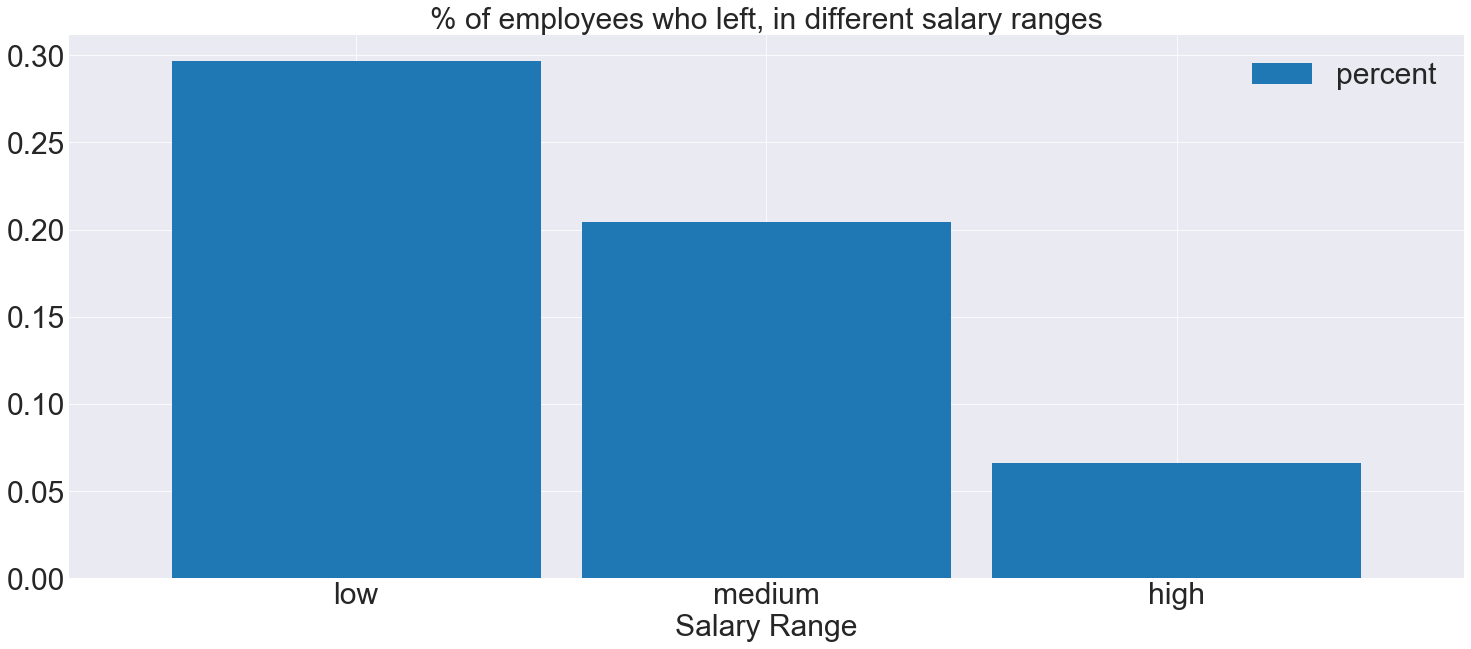

In [14]:
import matplotlib.pyplot as plt3
labels1=['low','medium','high']
plt3.title(fontsize=30,s="% of employees who left, in different salary ranges")
plt2.rcParams['figure.figsize']=(25,10)
df_salary['percent'].plot(kind='bar',legend=True,width=0.9)
plt3.xticks(range(0,3),labels1,fontsize=30,rotation=0)
plt3.yticks(fontsize=30)
plt3.legend(fontsize=30)
plt3.xlabel("Salary Range",fontsize=30)
plt3.savefig('E:\\residency_3\\SA 2\\mini-project\plots\\salary.png')

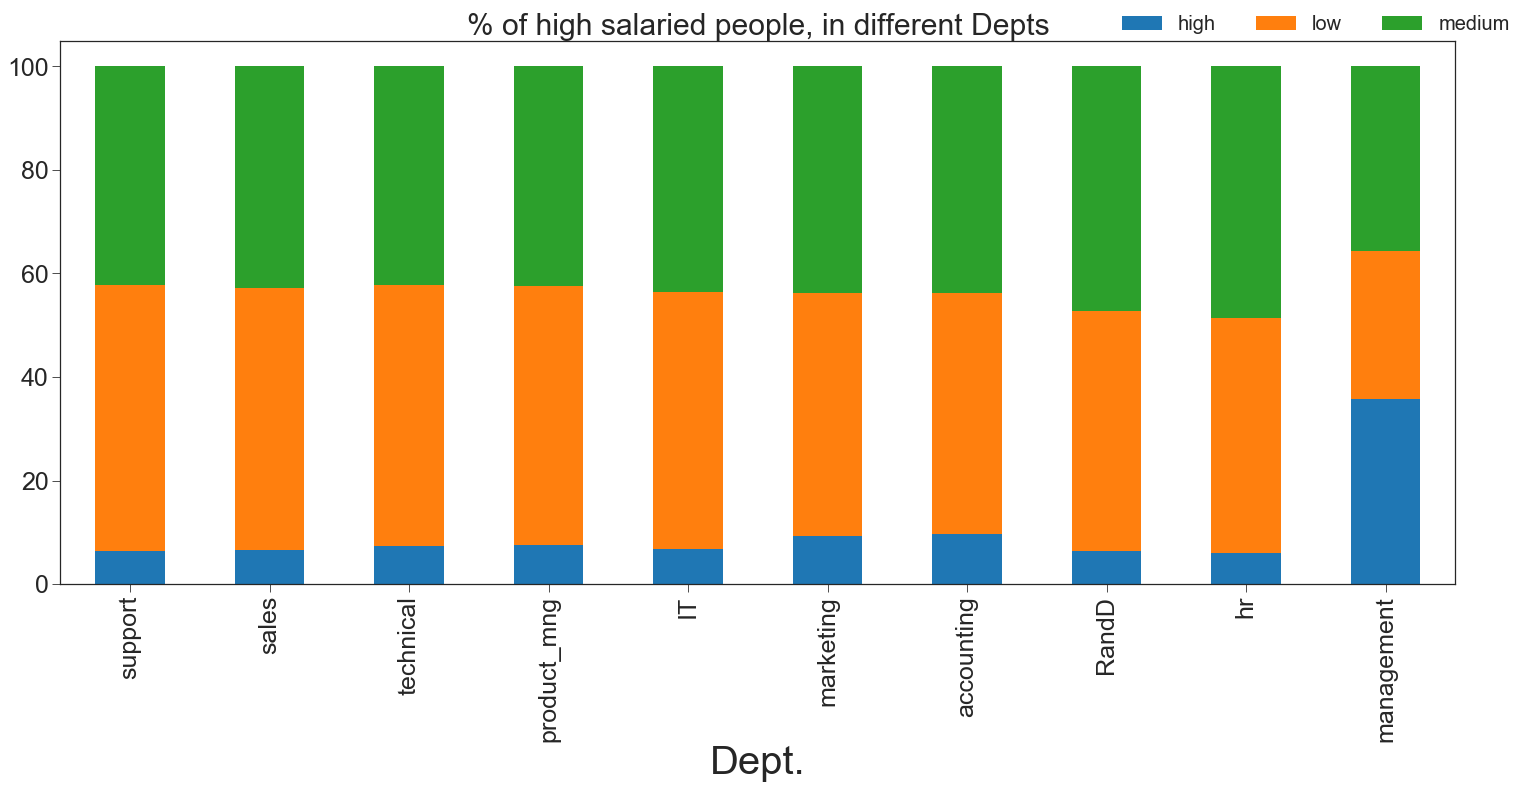

In [177]:
from matplotlib.font_manager import FontProperties
from matplotlib import pylab
import matplotlib.pyplot as plt5
df_new3=df1.groupby(['sales',"salary"])['left'].count().unstack().fillna(0)
df_new3['Total']=df_new3.high+df_new3.low+df_new3.medium
df_new3['high']=(df_new3['high']/df_new3['Total'])*100
df_new3['low']=(df_new3['low']/df_new3['Total'])*100
df_new3['medium']=(df_new3['medium']/df_new3['Total'])*100
del df_new3['Total']
df_new3.sort_values(by='low',ascending=False,inplace=True)
df_new3.plot(kind='bar',stacked=True,fontsize=25)
pylab.legend(loc=9, bbox_to_anchor=(0.9, 1.08), ncol=3,fontsize=20)
pylab.xlabel(s="Dept.",fontsize=40)
pylab.title(s="% of high salaried people, in different Depts",fontsize=30)
plt5.savefig('E:\\residency_3\\SA 2\\mini-project\plots\\Sal_dept.png')

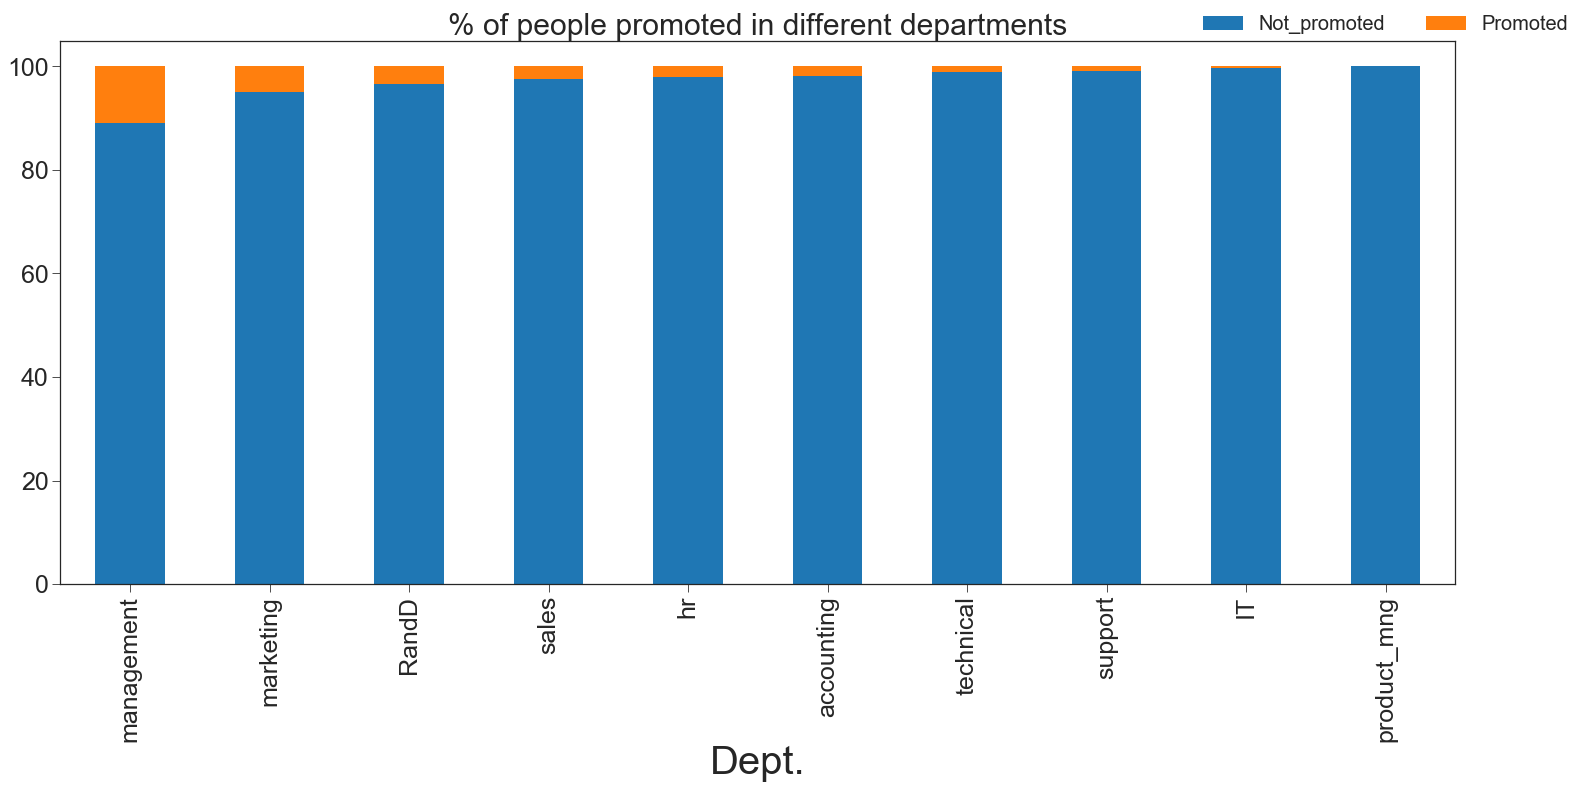

In [178]:
import matplotlib.pyplot as plt6
df5=df1.groupby(['sales',"promotion_last_5years"])['left'].count().unstack().fillna(0)
df5.columns=['Not_promoted','Promoted']
df5['Total']=df5['Promoted']+df5['Not_promoted']
df5['Promoted']=df5['Promoted']/df5['Total']*100
df5['Not_promoted']=df5['Not_promoted']/df5['Total']*100
del df5['Total']
df5.sort_values(by='Promoted',ascending=False,inplace=True)
df5.plot(kind='bar',stacked=True,fontsize=25)
pylab.legend(loc=9, bbox_to_anchor=(0.95, 1.08), ncol=3,fontsize=20)
pylab.xlabel(s="Dept.",fontsize=40)
pylab.title(s="% of people promoted in different departments",fontsize=30)
plt6.savefig('E:\\residency_3\\SA 2\\mini-project\plots\\dept_prom.png')

In [48]:
df_new=pd.DataFrame(df1.groupby(['salary',"promotion_last_5years","left"]).size())
df_new.columns=['count']
df_new=df_new.unstack()
df_new.columns = df_new.columns.get_level_values(0)
df_new.columns=['Stayed_count','Left_count']
df_new['percent']=df_new.Left_count/(df_new.Left_count+df_new.Stayed_count)
df_new.sort_values(by='percent',ascending=False,inplace=True)
df_new

Stayed_count  Left_count   percent
salary promotion_last_5years                                    
low    0                            5092.0      2158.0  0.297655
       1                              52.0        14.0  0.212121
medium 0                            4953.0      1312.0  0.209417
high   0                            1083.0        82.0  0.070386
medium 1                             176.0         5.0  0.027624
high   1                              72.0         NaN       NaN

In [42]:
df_new1=pd.DataFrame(df1.groupby(['sales',"promotion_last_5years","left"]).size())
df_new1.columns=['count']
df_new1=df_new1.unstack()
df_new1.columns = df_new1.columns.get_level_values(0)
df_new1.columns=['Stayed_count','Left_count']
df_new1['percent']=df_new1.Left_count/(df_new1.Left_count+df_new1.Stayed_count)
df_new1.sort_values(by='percent',ascending=False,inplace=True)
df_new1

,,Stayed_count,Left_count,percent
sales,promotion_last_5years,,,
hr,0,509.0,215.0,0.296961
accounting,0,549.0,204.0,0.270916
technical,0,1998.0,694.0,0.257801
support,0,1657.0,552.0,0.249887
sales,0,3033.0,1007.0,0.249257
marketing,0,612.0,203.0,0.249080
IT,0,954.0,270.0,0.220588
product_mng,0,704.0,198.0,0.219512
RandD,0,639.0,121.0,0.159211


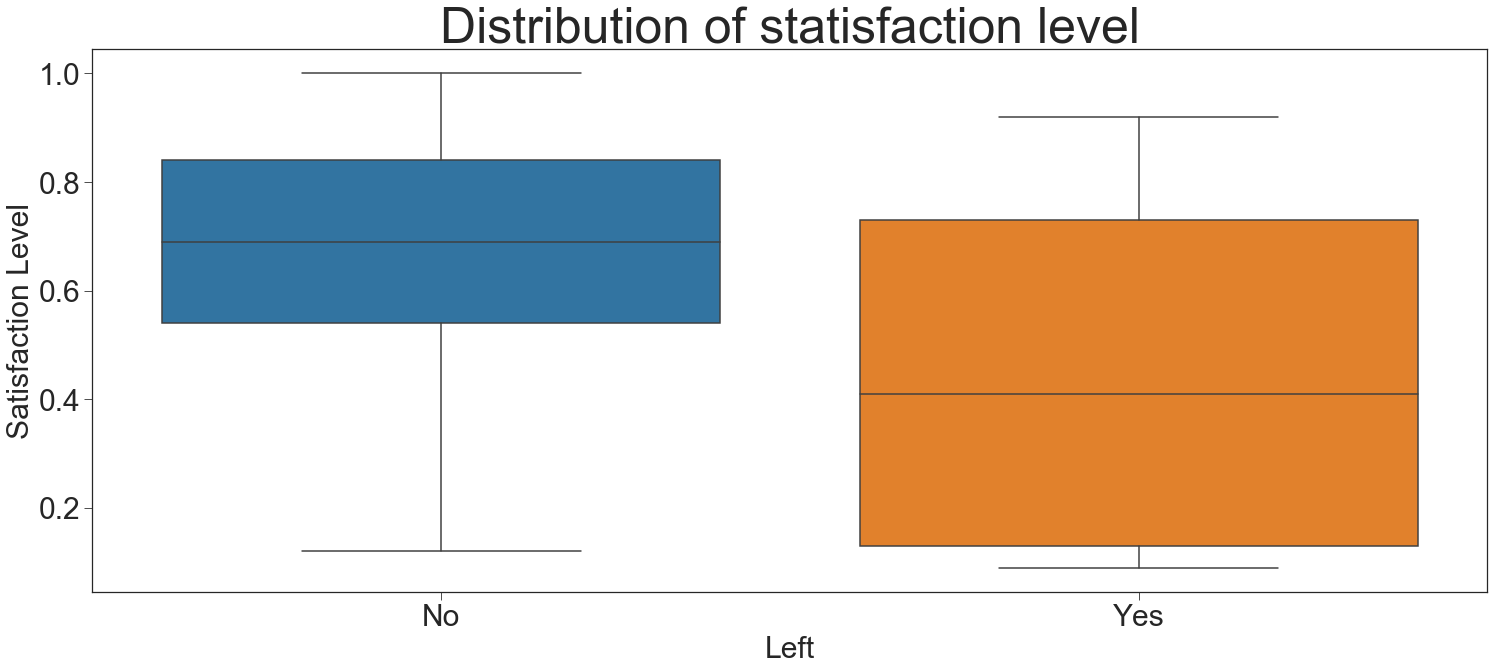

In [15]:
#Analyze how satisfied people who left were, in comparison to those who did not
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
b = sns.boxplot(x="left", y="satisfaction_level", data=df1)
b.set_title('Distribution of statisfaction level',fontsize=50)
b.set_xlabel("Left",fontsize=30)
b.set_ylabel("Satisfaction Level",fontsize=30)
b.tick_params(labelsize=30)
b.set_xticklabels(['No','Yes'])
plt2.savefig('E:\\residency_3\\SA 2\\mini-project\plots\\satisfaction.png')

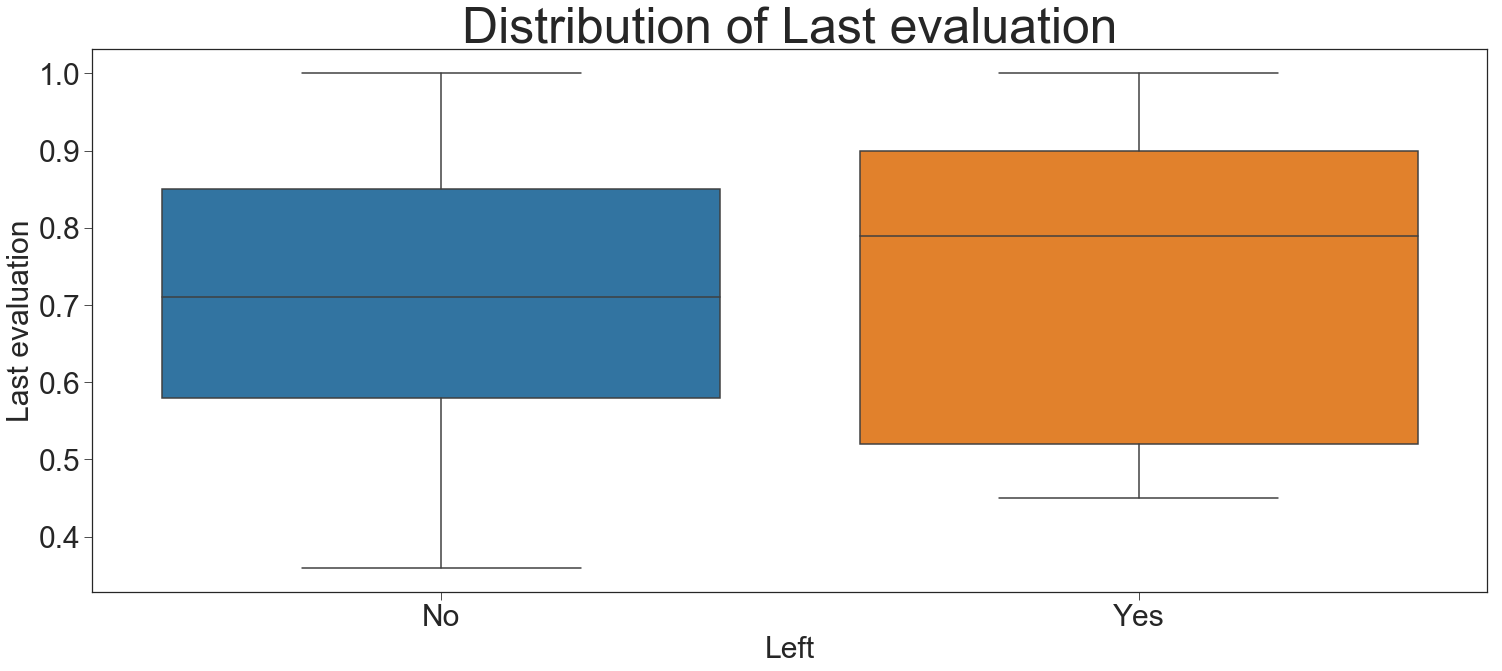

In [16]:
#Analyze how satisfied people who left were, in comparison to those who did not
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
b = sns.boxplot(x="left", y="last_evaluation", data=df1)
b.set_title('Distribution of Last evaluation',fontsize=50)
b.set_xlabel("Left",fontsize=30)
b.set_ylabel("Last evaluation",fontsize=30)
b.tick_params(labelsize=30)
b.set_xticklabels(['No','Yes'])
plt2.savefig('E:\\residency_3\\SA 2\\mini-project\plots\\satisfaction.png')